In [3]:
pip install git+https://github.com/mementum/backtrader.git#egg=backtrader

  Cloning https://github.com/mementum/backtrader.git to c:\users\intel300\appdata\local\temp\pip-install-2rz2bhg_\backtrader_616ac8bd29824b18a5e2fb722fd7e208
  Resolved https://github.com/mementum/backtrader.git to commit e2674b1690f6366e08646d8cfd44af7bb71b3970
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/mementum/backtrader.git 'C:\Users\intel300\AppData\Local\Temp\pip-install-2rz2bhg_\backtrader_616ac8bd29824b18a5e2fb722fd7e208'


In [4]:
import pandas as pd
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm1
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [55]:
from backtrader.feeds import GenericCSVData

class GenericCSV_up(GenericCSVData):

    # Add a 'pe' line to the inherited ones from the base class
    lines = ('up',)

    # openinterest in GenericCSVData has index 7 ... add 1
    # add the parameter to the parameters inherited from the base class
    params = (('up', 5),)

시작 자본: 20000000원
2022-01-22, 매수 주문, 2965000원
2022-01-23, 매수 체결, 매수량: 0.134907251264755473 ETH, 진입가: 2988000원, 진입금액: 403103원, 수수료 202원
2022-02-25, 매도 주문, 3329000원
2022-02-26, 매도 체결, 매도량: 0.134907251264755473 ETH, 청산가: 3373000원, 청산금액: 455042원, 수수료 228원
2022-02-26, [투자 이익] 총이익 51939원 | 순이익 51510원
2022-02-27, 매수 주문, 3378000원
2022-02-28, 매수 체결, 매수량: 0.118718236940345098 ETH, 진입가: 3217000원, 진입금액: 381917원, 수수료 191원
2022-03-01, 매도 주문, 3520000원
2022-03-02, 매도 체결, 매도량: 0.118718236940345098 ETH, 청산가: 3605000원, 청산금액: 427979원, 수수료 214원
2022-03-02, [투자 이익] 총이익 46063원 | 순이익 45658원
2022-03-02, 매수 주문, 3552000원
2022-03-03, 매수 체결, 매수량: 0.113159729432719236 ETH, 진입가: 3587000원, 진입금액: 405904원, 수수료 203원
2022-03-04, 매도 주문, 3285000원
2022-03-05, 매도 체결, 매도량: 0.113159729432719236 ETH, 청산가: 3247000원, 청산금액: 367430원, 수수료 184원
2022-03-05, [투자 이익] 총이익 -38474원 | 순이익 -38861원
2022-03-05, 매수 주문, 3245000원
2022-03-06, 매수 체결, 매수량: 0.123625928951915806 ETH, 진입가: 3290000원, 진입금액: 406729원, 수수료 203원
2022-03-06, 매도 주문, 3276000원
20

<IPython.core.display.Javascript object>


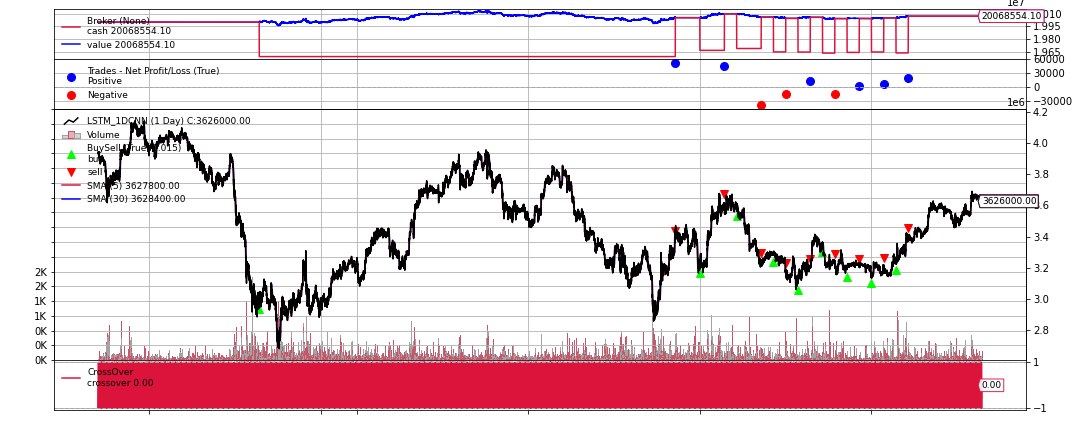

[[<Figure size 1080x432 with 5 Axes>]]

In [67]:
import backtrader as bt
#import backtrader.indicators as btind
# from datetime import datetime
import datetime

class TrendScanning_up(bt.Strategy):
    
    params = dict(
        pfast=5,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )
 
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None    
        
        
        self.n_wins = 0
        self.n_losses = 0
        self.profits = 0
        self.losses = 0
        
    def log(self, txt, dt=None):
        #dt = dt or self.datas[0].datetime.date(0)
        #print('%s, %s' % (dt.isoformat(), txt))
        #print('%s' % dt.isoformat(timespec='minutes'))
        #print(f'{dt.isoformat()} {txt}')
        
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
#         ''' Logging function fot this strategy'''
#         dt = dt or self.data.datetime[0]
#         if isinstance(dt, float):
#             dt = bt.num2date(dt)
#         print('%s, %s' % (dt.isoformat(), txt))        
        
        #sep=’T’, timespec=’auto’)
        #
        #
        #
        #
        #

        
#     def notify_order(self, order):
#         if order.status in [order.Submitted, order.Accepted]:
#             # Buy/Sell order submitted/accepted to/by broker - Nothing to do
#             return

#         # Check if an order has been completed
#         # Attention: broker could reject order if not enough cash
#         if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log('BUY EXECUTED, %.2f' % order.executed.price)
#             elif order.issell():
#                 self.log('SELL EXECUTED, %.2f' % order.executed.price)

#             self.bar_executed = len(self)

#         elif order.status in [order.Canceled, order.Margin, order.Rejected]:
#             self.log('Order Canceled/Margin/Rejected')

#         # Write down: no pending order
#         self.order = None        

        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

#         if order.status in [order.Submitted, order.Accepted]:
#             # Buy/Sell order submitted/accepted to/by broker - Nothing to do
#             self.log('ORDER ACCEPTED/SUBMITTED', dt=order.created.dt)
#             self.order = order
#             return        

        if order.status in [order.Expired]:
            self.log('구매 만료')        
        
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                buy_size = order.executed.size
                buy_price = order.executed.price
                buy_value = buy_price*buy_size
                self.log(
                    '매수 체결, 매수량: %.18f ETH, 진입가: %.0f원, 진입금액: %.0f원, 수수료 %.0f원' %
                    (order.executed.size,
                     order.executed.price,
                     #order.executed.value,
                     buy_value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: 
                sell_size = abs(order.executed.size)
                sell_price = order.executed.price
                sell_value = sell_price*sell_size
                self.log('매도 체결, 매도량: %.18f ETH, 청산가: %.0f원, 청산금액: %.0f원, 수수료 %.0f원' %
                         (abs(order.executed.size),
                          order.executed.price,
                          #order.executed.value,
                          sell_value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('주문 취소')

        self.order = None        
        
        
        
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        close = self.data.close[0]
        #size_p=round((self.broker.getcash() * 0.02)/close, 18)
        
        self.log('[투자 이익] 총이익 %.0f원 | 순이익 %.0f원' %
                 (trade.pnl, trade.pnlcomm))

        if trade.pnl > 0:
            self.n_wins += 1
            self.profits += trade.pnl
        else:
            self.n_losses += 1
            self.losses += trade.pnl        
 
#     def next(self): 
#         if not self.position:  # not in the market
#             if self.crossover > 0:  # if fast crosses slow to the upside
 
#                 close = self.data.close[0] 
#                 #size = int(self.broker.getcash() / close)
#                 size = 0.1
        
 
#                 self.buy(size=size)  
 
#         elif self.crossover < 0:  # in the market & cross to the downside
#             self.close()  
            
    def next(self): 
        
        #self.log('Close, %.2f' % self.data.close[0])
        
        if self.order:
            return

        if not self.position:  # not in the market
            if self.data.up[0]==-2: #self.crossover > 0

                
                
                #print(self.data.up[0])
                close = self.data.close[0] 
                #size = int(self.broker.getcash() / close) 
                #size = 0.1     
                size_coin = round((self.broker.getcash() * 0.02)/close, 18) 
                
                self.log('매수 주문, %.0f원' % self.data.close[0])
                self.order = self.buy(size=size_coin)
                #self.buy(size=size)  
 
        elif self.data.up[0]==-3:  # in the market & cross to the downside #self.crossover < 0
            #print(self.data.up[0])
            #self.close()  
            self.log('매도 주문, %.0f원' % self.dataclose[0])

            # Keep track of the created order to avoid a 2nd order
            #self.order = self.sell()
            self.order = self.close()
            
            
    def stop(self):
        
        if self.n_wins == 0:
            avg_profit = 0
        else:
            avg_profit = self.profits / self.n_wins
        
        
        if self.n_losses ==0:
            avg_loss = 0
        else:
            avg_loss = self.losses / self.n_losses
         
        
        if self.n_wins == 0:
            win_ratio = 0
        elif self.n_losses == 0:
            win_ratio = 100
        else:
            win_ratio = (self.n_wins / (self.n_wins + self.n_losses))*100
        
        #rate_of_return = ((self.profits+self.losses) / 1000000)*100 
        #expected_profit_per_trade = win_ratio * avg_profit + (1-win_ratio) * avg_loss
        
        
        #profit_loss_ratio = avg_profit / abs(avg_loss)
        if abs(avg_loss) == 0 or avg_profit== 0:
            print(f"승률:{win_ratio:.2f}% | " #win_ratio
               "손익비: N/A | " #profit_loss_ratio
               #f"수익률:{rate_of_return:.2f}% | "
               f"평균수익:{avg_profit:.0f}원 ", end='|')
              #MDD: ((최솟값-최댓값)/최댓값)*100 
               #f"거래당예상이익:{expected_profit_per_trade:.2f} ", end='|') #expected_profit_per_trade
        else:
            profit_loss_ratio = avg_profit / abs(avg_loss)
            print(f"승률:{win_ratio:.2f}% | " #win_ratio
               f"손익비:{profit_loss_ratio:.2f} | " #profit_loss_ratio
               #f"수익률:{rate_of_return:.2f}% | "
               f"평균수익:{avg_profit:.0f}원 ", end='|')
              #MDD: ((최솟값-최댓값)/최댓값)*100 
               #f"거래당예상이익:{expected_profit_per_trade:.2f} ", end='|') #expected_profit_per_trade            
 
cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
 



data = GenericCSV_up(
            dataname="C:/Users/intel300/workspace/LSTM_1DCNN.csv",

            fromdate=datetime.datetime(2022, 1, 9),
            todate=datetime.datetime(2022, 3, 23),

            nullvalue=0.0,
            
            dtformat=('%Y-%m-%d %H:%M:%S'),
            #dtformat=('%Y-%m-%d'),
            #tmformat=('%H:%M:%S'),

            datetime=0,
            time=-1,
            open=1,
            high=2,
            low=3,
            close=4,
            volume=6,
            openinterest=-1,
            up=5,

                        headers = True,
                        separator = ','
        )

cerebro.adddata(data)
seed_money = 20000000
cerebro.broker.setcash(seed_money) 

# Add a FixedSize sizer according to the stake
#cerebro.addsizer(bt.sizers.FixedSize, stake=1)

cerebro.broker.setcommission(commission=0.0005) 

cerebro.addstrategy(TrendScanning_up) 
 
#cerebro.run() 

# Print out the starting conditions
print('시작 자본: %.0f원' % cerebro.broker.getvalue()) #'Starting Portfolio Value: %.2f'

cerebro.addanalyzer(bt.analyzers.DrawDown)

# Run over everything
results = cerebro.run()

analyzers = results[0].analyzers
mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
print(f" MDD:{mdd:.2f}% ", end='|')

FPV = cerebro.broker.getvalue()
ROR = ((FPV-seed_money)/seed_money)*100

# Print out the final result
print(f" 수익률:{ROR:.2f}%") 

# Print out the final result
print('최종 자본: %.0f원' % cerebro.broker.getvalue()) 


plt.rcParams['figure.figsize']=[15, 6]
cerebro.plot() 